# Лабораторная работа №4. Шут Артём

### 1. Подключим несколько библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable as pt
from math import factorial as fact

### 2. Определим классы, реализующие методы, которые нам понадобятся в лабораторной

In [2]:
class Newton:    
    def init(self, xs, ys):
        fs = ys.copy()
        self._xs = []
        self._ys = []
        n = len(xs)
        self._ys.append(ys[0])
        
        for i in range(1, n):
            new_fs = []
            for j in range(len(fs) - 1):
                new_fs.append((fs[j + 1] - fs[j]) / (xs[j + i] - xs[j]))
            fs = new_fs.copy()
            self._ys.append(fs[0])
        
        self._xs = xs[:-1]
        self._xs.reverse()
        self._ys.reverse()
        
    def func(self, x):
        result = 0
        for xn, fn in zip(self._xs + [x - 1.0], self._ys):
            result = (result + fn) * (x - xn)
        return result  

In [3]:
class Lagrange:    
    def init(self, xs, ys):        
        self._xs = xs[:]
        self._ys = ys[:]
        
    def func(self, x):
        L = 0
        for i in range(len(self._xs)):
            l_i=1
            for j in range(len(self._xs)):
                if i != j:
                    l_i *= (x - self._xs[j]) / (self._xs[i] - self._xs[j])
            L += l_i * self._ys[i]
        return L 

In [4]:
class Spline:    
    def init(self, xs, ys):        
        n = len(xs)
        h = np.diff(xs)
        df = np.diff(ys)
        A = np.zeros((n, n))
        B = np.zeros((n, ))
        A[0, 0] = 1
        A[n-1, n-1] = 1
        for i in range(1, n-1):
            A[i, i - 1] = h[i-1]
            A[i][i] = 2 * (h[i-1] + h[i])
            A[i, i + 1] = h[i]
            B[i] = 3 * (df[i] / h[i] - df[i - 1] / h[i - 1])
        c = np.linalg.solve(A, B)
        d = np.zeros((n - 1,))
        b = np.zeros((n - 1,))
        for i in range(0, len(d)):
            d[i] = (c[i + 1] - c[i]) / (3 * h[i])
            b[i] = (df[i] / h[i]) - (h[i] / 3) * (2 * c[i] + c[i + 1])
        self._xs = xs.copy()
        self._ys = ys.copy()
        self._b = b
        self._c = c
        self._d = d
        
    def func(self, x):            
        for i in range(0, len(self._xs) - 1):
            if x <= self._xs[i+1]:
                break                
                     
        return self._ys[i] + self._b[i]*(x - self._xs[i]) + \
                self._c[i]*(x - self._xs[i])**2 + \
                self._d[i]*(x - self._xs[i])**3

In [5]:
class MNK:    
    k = 5
    
    def init(self, xs, ys):        
        n = len(xs)        
        Y = np.array(ys)
        X = np.ones((n, self.k))
        for i in range(n):
            for j in range(self.k):
                X[i][j] = xs[i]**j
        
        A = np.dot(X.transpose(), X)
        Y = np.dot(X.transpose(), Y)
        self.a = np.linalg.solve(A, Y)
        
    def func(self, x):
        return sum([self.a[i] * x**i for i in range(self.k)])

In [6]:
class Bezier:    
    def init(self, xs, ys):        
        self._xs = xs[:]
        self._ys = ys[:]
        
    def func(self, T):
        n = len(self._xs)-1                
        x = [0 for _ in range(T)]
        y = [0 for _ in range(T)]
        for t,i in zip(np.linspace(0, 1, T), range(T)):
            for k in range(len(self._xs)):
                Cnk = fact(n) / (fact(k) * fact(n - k))
                coeff = Cnk * t**k * (1-t)**(n-k)
                x[i] += self._xs[k] * coeff
                y[i] += self._ys[k] * coeff
        return x, y

### 3. Создадим объекты классов, реализующих необходимые нам методы

In [7]:
newton = Newton()
lagrange = Lagrange()
spline = Spline()
mnk = MNK()
bezier = Bezier()

### 4. Приступим к выполнению работы

## Задание 1

In [8]:
def f_1(x):
    return np.exp(2*x) * np.cos(3*x)
def f_2(x):
    return np.sin(np.log(x))
def f_3(x):
    return np.log(x)
def f_4(x):
    return np.cos(x) + np.sin(x)
fs = [f_1, f_2, f_3, f_4]
xs = [
    [0.0, 0.3, 0.6],
    [2.0, 2.4, 2.6],
    [1, 1.1, 1.3, 1.4],
    [0, 0.25, 0.5, 1],
]
points = [0.25, 0.51, 0.99, 1.09, 1.89, 2.39]
field_names = [
    'Точка',
    'Ошибка Ньютона',
    'Ошибка Лагранжа',
    'Ошибка сплайнов'
]
titles = [
    'f(x) = exp(2x)*cos(3x)',
    'f(x) = sin(ln(x))',
    'f(x) = ln(x)',
    'f(x) = cos(x) + sin(x)'
]

In [9]:
def print_interpolation(j):

    _ys=[fs[j](x) for x in xs[j]]
    _xs=xs[j]
    
    newton.init(xs=_xs, ys=_ys)
    lagrange.init(xs=_xs, ys=_ys)
    spline.init(xs=_xs, ys=_ys)
    
    x = np.linspace(xs[j][0], xs[j][-1], 30)
    y_newton   = [newton.func(i) for i in x]
    y_lagrange = [lagrange.func(i) for i in x]
    y_spline = [spline.func(i) for i in x]
    y_real = [fs[j](i) for i in x]
    
    print('\n')
    print('\t\t' + titles[j])
    plt.grid()
    plt.plot(x, y_real, x, y_newton, x, y_lagrange, x, y_spline)
    plt.show()   
    
    table = pt(field_names)
    for i in range(len(points)):
        table.add_row([
            "%.2f" % points[i], 
            "%.7f" % abs(newton.func(points[i]) - fs[j](points[i])),
            "%.7f" % abs(lagrange.func(points[i]) - fs[j](points[i])),
            "%.7f" % abs(spline.func(points[i]) - fs[j](points[i]))
        ])
    print(table)
    



		f(x) = exp(2x)*cos(3x)


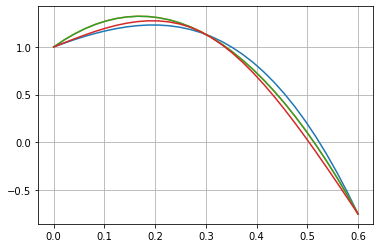

+-------+----------------+-----------------+-----------------+
| Точка | Ошибка Ньютона | Ошибка Лагранжа | Ошибка сплайнов |
+-------+----------------+-----------------+-----------------+
|  0.25 |   0.0444406    |    0.0444406    |    0.0327529    |
|  0.51 |   0.0892855    |    0.0892855    |    0.1635070    |
|  0.99 |   0.9096091    |    0.9096091    |    4.3818614    |
|  1.09 |   0.5937322    |    0.5937322    |    6.3124510    |
|  1.89 |   67.7156738   |    67.7156738   |    6.7293530    |
|  2.39 |  129.2492903   |   129.2492903   |    16.9664333   |
+-------+----------------+-----------------+-----------------+


In [10]:
print_interpolation(0)



		f(x) = sin(ln(x))


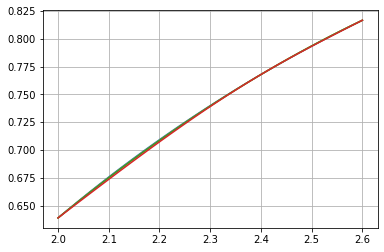

+-------+----------------+-----------------+-----------------+
| Точка | Ошибка Ньютона | Ошибка Лагранжа | Ошибка сплайнов |
+-------+----------------+-----------------+-----------------+
|  0.25 |   0.5666157    |    0.5666157    |    1.8875541    |
|  0.51 |   0.4145981    |    0.4145981    |    1.2837135    |
|  0.99 |   0.1375464    |    0.1375464    |    0.4654357    |
|  1.09 |   0.1039530    |    0.1039530    |    0.3589597    |
|  1.89 |   0.0017437    |    0.0017437    |    0.0064157    |
|  2.39 |   0.0000310    |    0.0000310    |    0.0000374    |
+-------+----------------+-----------------+-----------------+


In [11]:
print_interpolation(1)



		f(x) = ln(x)


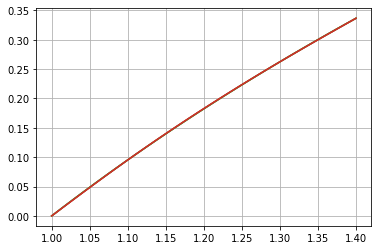

+-------+----------------+-----------------+-----------------+
| Точка | Ошибка Ньютона | Ошибка Лагранжа | Ошибка сплайнов |
+-------+----------------+-----------------+-----------------+
|  0.25 |   0.2892057    |    0.2892057    |    1.3430234    |
|  0.51 |   0.0477806    |    0.0477806    |    0.3890509    |
|  0.99 |   0.0000201    |    0.0000201    |    0.0003589    |
|  1.09 |   0.0000078    |    0.0000078    |    0.0001214    |
|  1.89 |   0.0172499    |    0.0172499    |    0.1791142    |
|  2.39 |   0.1342833    |    0.1342833    |    1.1877030    |
+-------+----------------+-----------------+-----------------+


In [12]:
print_interpolation(2)



		f(x) = cos(x) + sin(x)


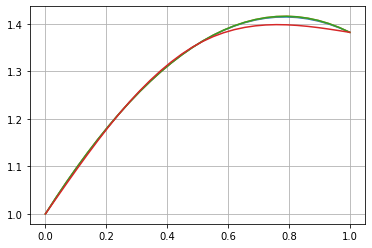

+-------+----------------+-----------------+-----------------+
| Точка | Ошибка Ньютона | Ошибка Лагранжа | Ошибка сплайнов |
+-------+----------------+-----------------+-----------------+
|  0.25 |   0.0000000    |    0.0000000    |    0.0000000    |
|  0.51 |   0.0000358    |    0.0000358    |    0.0004648    |
|  0.99 |   0.0002029    |    0.0002029    |    0.0019163    |
|  1.09 |   0.0027563    |    0.0027563    |    0.0238634    |
|  1.89 |   0.2173101    |    0.2173101    |    1.0839321    |
|  2.39 |   0.7452707    |    0.7452707    |    2.9219863    |
+-------+----------------+-----------------+-----------------+


In [13]:
print_interpolation(3)

## Задание 2

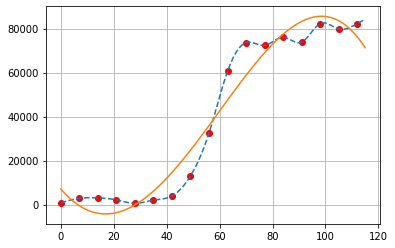

In [14]:
data = pd.read_excel("cases.xls")
data = np.array(data)
cases = np.array([d[0] for d in data])

days = np.array(range(len(cases)))
cases = np.array(cases)[::7]
weeks = days[::7]
plt.plot(weeks, cases,'ro')

x = np.linspace(days[0], days[-1], 100)
spline.init(weeks, cases)
mnk.init(weeks, cases)

y_spline = [spline.func(i) for i in x]
y_mnk = [mnk.func(i) for i in x]

plt.plot(x, y_spline, '--', x, y_mnk, '-')
plt.grid(True) 

plt.show()

## Задание 3

In [15]:
N_xs = np.array([
    [3, 6.5, 7],
    [7, 8],
    [8, 10, 13]
])
N_ys = np.array([
    [3, 2.7, 10],
    [10, 3],
    [3, 10.5, 11]
])

A_xs = np.array([
    [2, 3, 7],
    [7, 9],
    [9, 6.5, 9],
    [4, 9.5]
])
A_ys = np.array([
    [3, 0, 10],
    [10, 10.2],
    [10.2, 2, 2.5],
    [5.6, 6.2]
])

In [16]:
def print_curve(xs, ys):
    fig, ax = plt.subplots()
    for x, y in zip(xs, ys):
        bezier.init(x, y)
        _x, _y = bezier.func(100)
        ax.plot(_x, _y)

    fig.set_figwidth(6)
    fig.set_figheight(6)
    plt.show()

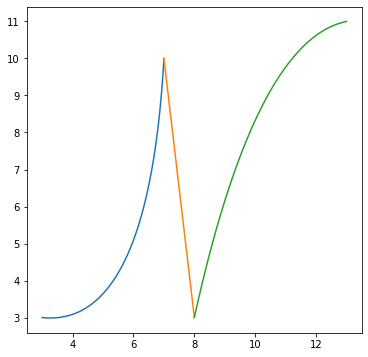

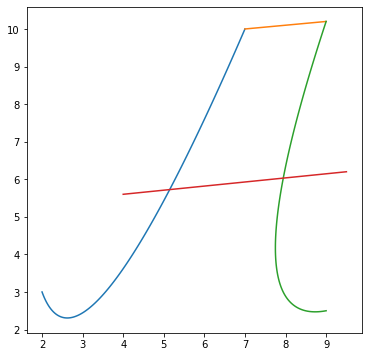

In [17]:
print_curve(N_xs, N_ys)
print_curve(A_xs, A_ys)